In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Line fitting the matrix way
This in-class exercise walks you through the following steps to fit a line to several datasets:
1. Create the datasets.
2. Construct design matrices.
3. Compute the weights using matrix inversion.
4. Plot the data and the fitted line.

## Linear (line) models

---
**Task 1 (easy): Identifying parameters👩‍💻**
1. Run the cell below to load the neccessary libraries and to construct the datasets.

2. Identify the inputs and the labels of each dataset. 



---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.array([[10, 2], [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])

#y = mx+b

#y1 = [x1 1] m
#y2 = [x2 1] b
# 
# Y = A[W]
# 
# A^1 y = w A^1 



---
**Task 2 (easy): Identifying parameters and constructing the design matrix👩‍💻**
1. Complete the `separate_inputs_labels`
 function below. The function should take a dataset as input and return the inputs and labels separated into separate variables. The function should return a matrix `X`
 containing the inputs and an array `y`
 containing the labels. Use the function to obtain the inputs and labels for each dataset.


**Hint**
Slicing might be helpful here.

2. Complete the code below and construct the design matrix for the other datasets. Print your results.


---

In [35]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.

    Returns:
    X (numpy array): The input matrix (first column).
    y (numpy array): The labels array (second column).
    """
    X = dataset[:, 0]  # Extract the first column as inputs
    y = dataset[:, 1]  # Extract the second column as labels
    return X, y

# construct the design matrix for dataset_1
X1_design = separate_inputs_labels(dataset_1)
X1, y1 = separate_inputs_labels(dataset_1)

# Print the datasets
print("X1 = \n", X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)


X1 = 
 [10  9]
y1 = [2 6]
Design Matrix for Dataset 1:
 (array([10,  9]), array([2, 6]))



---
**Task 3 (easy): Solve for model parameters👩‍💻**
1. Find the inverse of the design matrix for each dataset constructed above.
2. Calculate the model weights, then print your results.
3. Use the `plot_model`
 function to plot your results.
4. Visually inspect the plots and interpret the meaning and influence of each term.


---

Weights for Dataset 1: [-4. 42.]


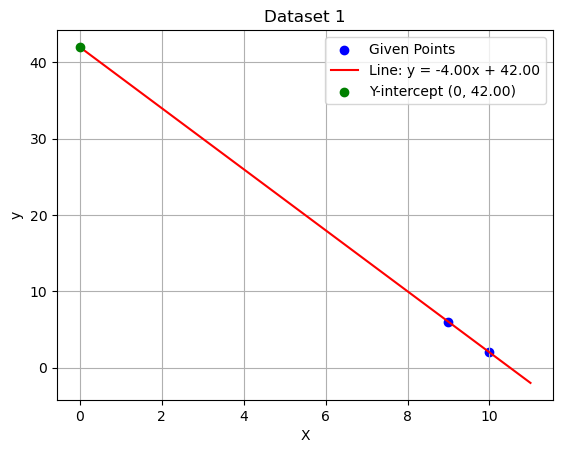

In [37]:
# Adding a bias (intercept) term to the input matrix
X1_bias = np.column_stack((X1, np.ones(X1.shape[0])))

# Calculating the weights using the normal equation
weights1 = np.linalg.inv(X1_bias.T @ X1_bias) @ X1_bias.T @ y1

print("Weights for Dataset 1:", weights1)

# Function to plot data points and fitted line
def plot_model(X, y, wieghts, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = wieghts[0] * x_vals + wieghts[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {wieghts[0]:.2f}x + {wieghts[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, wieghts[1], color='green', zorder=5, label=f'Y-intercept (0, {wieghts[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_model(X1, y1, weights1, 'Dataset 1')

If you have more time, complete the next task.

---
**Task 4 (easy): A new dataset👩‍💻♾️💡**
Run the cell below to define a new dataset.
1. Identify the inputs and the labels, then reuse the code from previous tasks to construct a design matrix.
2. Calculate the inverse of the design matrix. This step should result in an error. What are the possible reasons for getting this error?

**Note:** For pedagogical reasons, next week we will return to this dataset, as you will have the necessary tools to fit a model for this scenario.


---

In [0]:
dataset_4 = np.array([[9, 1], [7, 2],[3, 8], [1, 3],[4, 3]])